In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
## data summary
iris = load_iris ()
t=dir(iris)
print("The structure of iris data:\n")
print(t)
print("data dimension: ", iris.data.shape, "\nfeature name\n",
iris.feature_names)
print("data label:\n", iris.target)
print("Check the location of this dataset\n")
print(iris.filename)

The structure of iris data:

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
data dimension:  (150, 4) 
feature name
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data label:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Check the location of this dataset

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv


In [2]:
whole_iris_data=np.c_[iris.data, iris.target]
whole_iris_variables=iris.feature_names + ['target']
iris_data=pd.DataFrame(data=whole_iris_data,
columns=whole_iris_variables)
iris_data.head()
## make sure the label (target) is an integer type
iris_data['target']=iris_data['target'].astype('int64')
print(iris['target'])
print(iris_data.head())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]


In [3]:
filename='iris_data.csv'
iris_data.to_csv(filename)
import os
if os.path.isfile(filename):
    print(filename + " is saved!\n")
else:
    print(filename + " does not exist\n")

iris_data.csv is saved!



In [4]:
iris_binary = iris_data[(iris_data['target']==0)|(iris_data['target']==1)]
print("\n", iris_binary.head(), "\n\n***The iris binary data dimension: ",iris_binary.shape)
X_binary = iris_binary.iloc[:, :2]
y = iris_binary["target"]
training_data = X_binary
training_data_label = y


    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns] 

***The iris binary data dimension:  (100, 5)


In [5]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(training_data, training_data_label)

rbf_svc = svm.SVC(kernel='rbf', gamma='scale')
rbf_svc.fit(training_data, training_data_label)

poly_svc = svm.SVC(kernel='poly', degree=3)
poly_svc.fit(training_data, training_data_label)

sig_svc = svm.SVC(kernel='sigmoid')
sig_svc.fit(training_data, training_data_label)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
h = .01
x_min, x_max = X_binary.iloc[:, 0].min() - 1, X_binary.iloc[:, 0].max() + 1
y_min, y_max = X_binary.iloc[:, 1].min() - 1, X_binary.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [0]:
test_data = np.c_[xx.ravel(), yy.ravel()]

 This is the test data label under SVC Linear Kernel
[1 1 1 ... 1 1 1]
The first 5x5 entries of the reshaped 2D test data label

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 This is the test data label under SVC Sigmoid Kernel
[1 1 1 ... 0 0 0]
The first 5x5 entries of the reshaped 2D test data label

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 This is the test data label under SVC RBF Kernel
[0 0 0 ... 0 0 0]
The first 5x5 entries of the reshaped 2D test data label

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
 This is the test data label under SVC Polynomial (degree 3) Kernel
[0 0 0 ... 1 1 1]
The first 5x5 entries of the reshaped 2D test data label

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


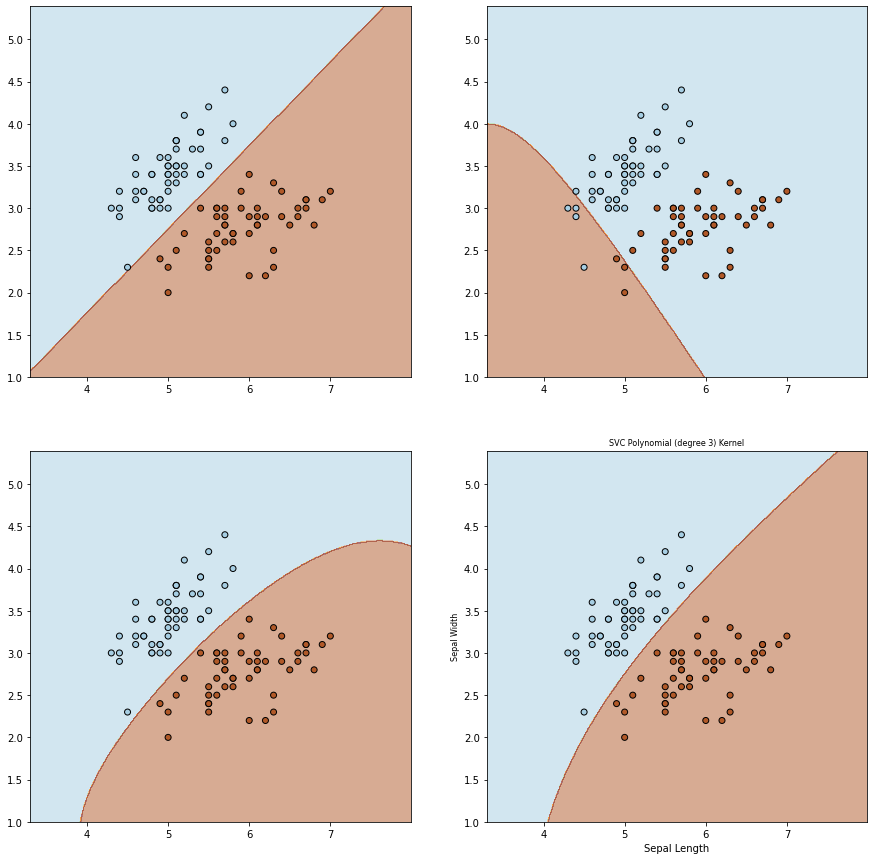

In [8]:
## visualization
plt.figure(figsize=(15, 15))
# title for the plots
titles = ['SVC Linear Kernel','SVC Sigmoid Kernel','SVC RBF Kernel','SVC Polynomial (degree 3) Kernel']
import time
svc_list=[linear_svc,sig_svc,rbf_svc,poly_svc]
kernels=['linear', 'sigmoid', 'rbf', 'poly']
sv_list={}# support vector list

for i, clf in enumerate(svc_list):
    plt.subplot(2, 2,i+1)
    test_data_label = clf.predict(test_data)
    sv_list[kernels[i]]=clf.support_vectors_
    
    print(" This is the test data label under " + titles[i])
    print(test_data_label)
    
    time.sleep(2)
    test_data_label = test_data_label.reshape(xx.shape)
    
    print("The first 5x5 entries of the reshaped 2D test data label\n")
    print(test_data_label[0:5, 0:5])
    plt.contourf(xx, yy, test_data_label, cmap=plt.get_cmap('Paired'), alpha=0.5)
    plt.scatter(training_data.iloc[:, 0],training_data.iloc[:, 1],c=y, cmap=plt.get_cmap('Paired'),edgecolors='black')
if i >=2:
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width', fontsize=8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles[i], fontsize=8)
    plt.show()

In [1]:
pip install umap_learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Created wheel for umap-learn: filename=umap_learn-0.4.1-cp36-none-any.whl size=66317 sha256=7dbc82f4724ce139045fdc29523422d8efc09f799900caa73b2967103d2ac948
  Stored in directory: C:\Users\charleneliu\AppData\Local\pip\Cache\wheels\0c\f0\0f\8a9ca1e4d229be3a21e1afe483acfd7ccb93e9a65cf752b446
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [2]:
filename='2019nCov_data_2.csv'
from google.colab import files
uploaded=files.upload()
import io
data=pd.read_csv(io.BytesIO(uploaded[filename]))

NameError: name 'files' is not defined